In [2]:
# import necessary packages
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import os
%matplotlib inline

In [3]:
# change the directory to where the data files are stored
path = "./data/"
os.chdir(path)

In [4]:
checking = pd.read_csv("checking.csv")
checking.head()

,Date,Time,Amount,Type,Description
0,2019-02-15,00:08:00,0.12,Deposit,Interest Paid
1,2019-02-05,05:17:51,27.00,Deposit,VENMO CASHOUT
2,2019-02-04,06:32:21,325.46,Deposit,PAYPAL TRANSFER
3,2019-02-04,05:13:50,-413.63,Withdrawal,CAPITAL ONE CRCARDPMT
4,2019-01-28,05:59:33,250.00,Deposit,VENMO CASHOUT


In [270]:
savings = pd.read_csv("savings.csv")
savings.head()

,Date,Time,Amount,Type,Description
0,2019-02-15,00:12:02,31.57,Deposit,Interest Paid
1,2019-01-15,00:54:18,30.70,Deposit,Interest Paid
2,2019-01-03,17:02:13,-2000.00,Withdrawal,Internet transfer to Interest Checking account...
3,2018-12-21,00:05:31,70.55,Deposit,eCheck Deposit
4,2018-12-15,00:32:54,31.33,Deposit,Interest Paid


In [271]:
# there are hidden white spaces in some of the column names
checking.columns

Index(['Date', ' Time', ' Amount', ' Type', ' Description'], dtype='object')

In [272]:
# rename columns to get rid of white spaces
checking = checking.rename(columns={" Time": "Time", " Amount": "Amount", " Type": "Type", 
                      " Description": "Description"})
checking.columns

Index(['Date', 'Time', 'Amount', 'Type', 'Description'], dtype='object')

In [273]:
savings.columns

Index(['Date', ' Time', ' Amount', ' Type', ' Description'], dtype='object')

In [274]:
# rename columns to get rid of white spaces
savings = savings.rename(columns={" Time": "Time", " Amount": "Amount", " Type": "Type", 
                      " Description": "Description"})
savings.columns

Index(['Date', 'Time', 'Amount', 'Type', 'Description'], dtype='object')

In [275]:
# grab deposits only (withdrawals tell us nothing about income)
checking_dep = checking[checking["Type"] == "Deposit"]
print("Checking shape", checking_dep.shape)

savings_dep = savings[savings["Type"] == "Deposit"]
print("Savings shape", checking_dep.shape)

Checking shape (92, 5)
Savings shape (92, 5)


Desposits from Oct. 2017 to Mar. 2019. Only 92 deposits, so we are likely to see sparse data for users as well.

In [276]:
checking_dep.describe(include="all")

,Date,Time,Amount,Type,Description
count,92,92,92.000000,92,92
unique,74,89,NaN,1,29
top,2017-11-03,04:00:36,NaN,Deposit,PAYPAL TRANSFER
freq,3,2,NaN,92,19
mean,NaN,NaN,493.905978,NaN,NaN
std,NaN,NaN,771.481551,NaN,NaN
min,NaN,NaN,0.050000,NaN,NaN
25%,NaN,NaN,1.977500,NaN,NaN
50%,NaN,NaN,95.000000,NaN,NaN
75%,NaN,NaN,504.250000,NaN,NaN


The mean deposit is 493.90 with a standard deviation of 771.48. <br>
There were only 29 unique sources of deposits - so most were recurring.

In [277]:
savings_dep.describe(include="all")

,Date,Time,Amount,Type,Description
count,43,43,43.000000,43,43
unique,40,41,NaN,1,12
top,2018-09-11,05:38:04,NaN,Deposit,Interest Paid
freq,2,2,NaN,43,17
mean,NaN,NaN,758.050930,NaN,NaN
std,NaN,NaN,2329.929828,NaN,NaN
min,NaN,NaN,0.010000,NaN,NaN
25%,NaN,NaN,32.170000,NaN,NaN
50%,NaN,NaN,48.300000,NaN,NaN
75%,NaN,NaN,526.060000,NaN,NaN


The mean amount deposited into savings was 758 with a large standard deviation of 2329. <br>
Savings deposits came from 12 unique sources.

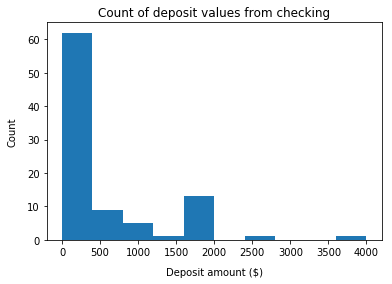

In [278]:
checking_dep.Amount.hist();
plt.grid(False);
plt.title("Count of deposit values from checking");
plt.xlabel("Deposit amount ($)",labelpad=10);
plt.ylabel("Count",labelpad=10);

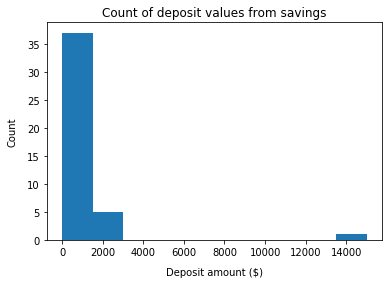

In [279]:
savings_dep.Amount.hist();
plt.grid(False);
plt.title("Count of deposit values from savings");
plt.xlabel("Deposit amount ($)",labelpad=10);
plt.ylabel("Count",labelpad=10);

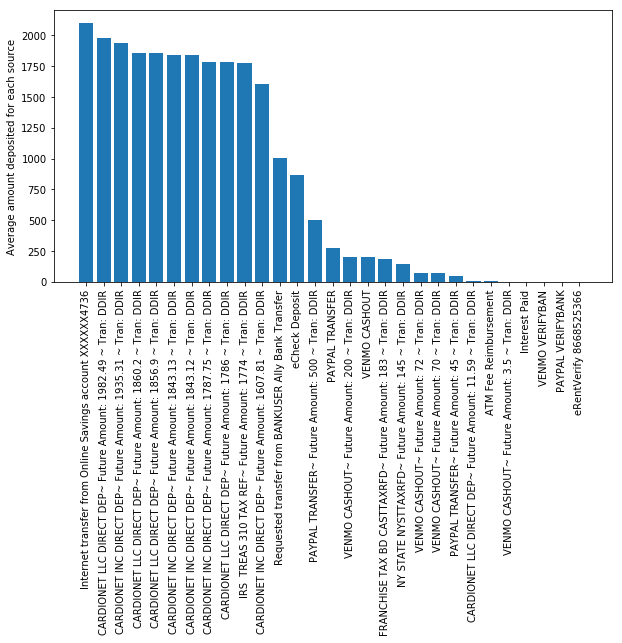

In [280]:
# Let’s look at the average deposit for each source
source = checking_dep.groupby("Description")["Amount"].mean().reset_index() #.plot(kind="bar",figsize=(10,5))
source = source.sort_values("Amount", ascending=False);
figure(figsize=(10, 5))
plt.bar("Description","Amount",data=source);
plt.xticks(rotation=90);
plt.ylabel("Average amount deposited for each source");

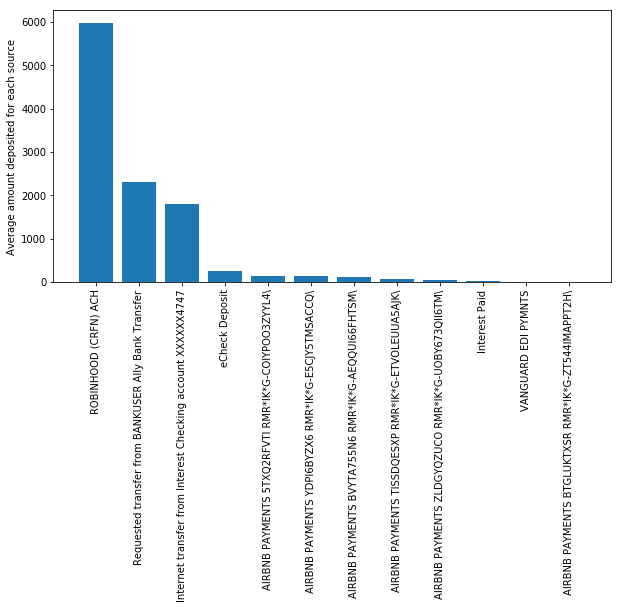

In [281]:
# Let’s look at the average deposit for each source
source = savings_dep.groupby("Description")["Amount"].mean().reset_index() #.plot(kind="bar",figsize=(10,5))
source = source.sort_values("Amount", ascending=False);
figure(figsize=(10, 5))
plt.bar("Description","Amount",data=source);
plt.xticks(rotation=90);
plt.ylabel("Average amount deposited for each source");

### Feature Engineering

In [282]:
# let’s stack the data frames and start creating features
all_deposits = pd.concat([checking_dep,savings_dep],ignore_index=True)
all_deposits.head()

,Date,Time,Amount,Type,Description
0,2019-02-15,00:08:00,0.12,Deposit,Interest Paid
1,2019-02-05,05:17:51,27.00,Deposit,VENMO CASHOUT
2,2019-02-04,06:32:21,325.46,Deposit,PAYPAL TRANSFER
3,2019-01-28,05:59:33,250.00,Deposit,VENMO CASHOUT
4,2019-01-15,00:51:30,0.08,Deposit,Interest Paid


If the amount ends in 0, unlikely to be from job. This may not always be true. 

In [283]:
# function to determine if Amount is whole number 
def isWholeNumber(x):
    if x.is_integer():
        return "1"
    if not x.is_integer():
        return "0"

In [284]:
all_deposits["Whole_number"] = all_deposits["Amount"].apply(isWholeNumber)

In [285]:
all_deposits.head()

,Date,Time,Amount,Type,Description,Whole_number
0,2019-02-15,00:08:00,0.12,Deposit,Interest Paid,0
1,2019-02-05,05:17:51,27.00,Deposit,VENMO CASHOUT,1
2,2019-02-04,06:32:21,325.46,Deposit,PAYPAL TRANSFER,0
3,2019-01-28,05:59:33,250.00,Deposit,VENMO CASHOUT,1
4,2019-01-15,00:51:30,0.08,Deposit,Interest Paid,0


Pay likely falls on certain days of the month, so let’s create a feature to encapsulate day.

In [286]:
# convert Date to datetime object 
all_deposits["Date"] = pd.to_datetime(all_deposits.Date)

In [290]:
# function to extract day of month from datetime object
all_deposits["Day_of_month"] = all_deposits.Date.apply(lambda x: x.day)

# function to extract day of week from datetime object
all_deposits["Day_of_week"] = all_deposits.Date.apply(lambda x: x.weekday())

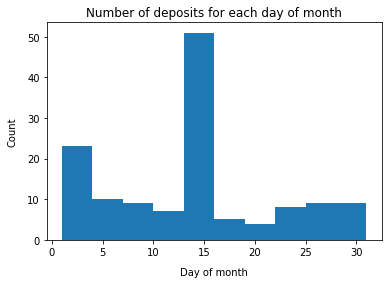

In [291]:
# deposits from income will likely have more regularity in 
all_deposits.Day_of_month.hist();
plt.grid(False);
plt.title("Number of deposits for each day of month");
plt.xlabel("Day of month",labelpad=10);
plt.ylabel("Count",labelpad=10);

There is a pretty striking pattern here - most deposits were made on the 1st or the 15th of the month. I know I got paid on these days, but we might assume others would be on a similar schedule (for some models of employment).

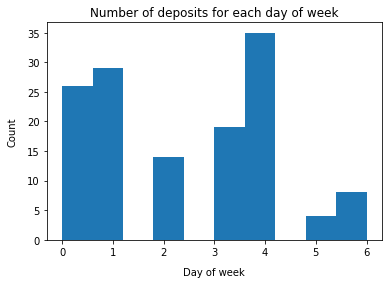

In [292]:
# deposits from income will likely have more regularity in 
all_deposits.Day_of_week.hist();
plt.grid(False);
plt.title("Number of deposits for each day of week");
plt.xlabel("Day of week",labelpad=10);
plt.ylabel("Count",labelpad=10);

There’s not as clear of a pattern here, but most deposits were made on Monday, Tuesday, and Friday. 

Now, what can we do about the descriptors? All of my paychecks from Cardionet are grouped separately, because of the way the descriptor was named. It would be best to vectorize these and group based on vector similarity. Before I go down this route, let’s just try k-means out with just using the first two two words of the descriptor. This is probably enough, but it may not be scalable to other financial institutions.

In [304]:
def getFirstTwoWords(x):
  
    words = x.split(' ')
    a = words[0]
    
    return a

In [305]:
all_deposits['Short_Description'] = all_deposits.Description.apply(getFirstTwoWords)

In [306]:
all_deposits.head()

,Date,Time,Amount,Type,Description,Whole_number,Day_of_month,Day_of_week,Short_Description
0,2019-02-15,00:08:00,0.12,Deposit,Interest Paid,0,15,4,Interest
1,2019-02-05,05:17:51,27.00,Deposit,VENMO CASHOUT,1,5,1,VENMO
2,2019-02-04,06:32:21,325.46,Deposit,PAYPAL TRANSFER,0,4,0,PAYPAL
3,2019-01-28,05:59:33,250.00,Deposit,VENMO CASHOUT,1,28,0,VENMO
4,2019-01-15,00:51:30,0.08,Deposit,Interest Paid,0,15,1,Interest


Let’s see how much we reduced our number of descriptors.

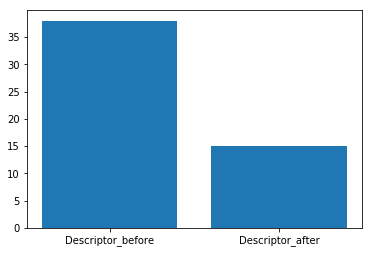

In [307]:
y = [all_deposits.Description.nunique(),all_deposits.Short_Description.nunique()]
x = ['Descriptor_before','Descriptor_after']
plt.bar(x,y);

We cut down this variable by nearly half

In [308]:
all_deposits.describe()

,Amount,Day_of_month,Day_of_week
count,135.000000,135.000000,135.000000
mean,578.041037,13.748148,2.385185
std,1456.345828,8.040679,1.803749
min,0.010000,1.000000,0.000000
25%,10.795000,7.000000,1.000000
50%,65.000000,15.000000,2.000000
75%,515.850000,16.000000,4.000000
max,15000.000000,31.000000,6.000000


In [309]:
x_25 = np.percentile(all_deposits.Amount, 25)
x_50 = np.percentile(all_deposits.Amount, 50)
x_75 = np.percentile(all_deposits.Amount, 75)
max_ = max(all_deposits.Amount)

In [310]:
# bin amount data
def binAmount(x):
    
    x_25 = np.percentile(all_deposits.Amount, 25)
    x_50 = np.percentile(all_deposits.Amount, 50)
    x_75 = np.percentile(all_deposits.Amount, 75)
    max_ = max(all_deposits.Amount)
    
    if x < x_25:
        return 'low'
    elif (x >= x_25) & (x < x_50):
        return 'mid1'
    elif (x >= x_50) & (x < x_75):
        return 'mid2'
    elif (x >= x_75) & (x <= max_):
        return 'high'

In [311]:
all_deposits['binned_amount'] = all_deposits.Amount.apply(binAmount)
all_deposits.head()

,Date,Time,Amount,Type,Description,Whole_number,Day_of_month,Day_of_week,Short_Description,binned_amount
0,2019-02-15,00:08:00,0.12,Deposit,Interest Paid,0,15,4,Interest,low
1,2019-02-05,05:17:51,27.00,Deposit,VENMO CASHOUT,1,5,1,VENMO,mid1
2,2019-02-04,06:32:21,325.46,Deposit,PAYPAL TRANSFER,0,4,0,PAYPAL,mid2
3,2019-01-28,05:59:33,250.00,Deposit,VENMO CASHOUT,1,28,0,VENMO,mid2
4,2019-01-15,00:51:30,0.08,Deposit,Interest Paid,0,15,1,Interest,low


Let’s prepare to cluster deposits using k-means model

In [312]:
# factorize columns that are integers
all_deposits['Day_of_month'] = all_deposits['Day_of_month'].astype(object)
all_deposits['Day_of_week'] = all_deposits['Day_of_week'].astype(object)

In [261]:
cols = ['binned_amount','Whole_number', 'Day_of_month', 'Day_of_week', 'Short_Description']
model_data = all_deposits[cols]
model_data.head()

,binned_amount,Whole_number,Day_of_month,Day_of_week,Short_Description
0,low,0,15,4,InterestPaid
1,mid1,1,5,1,VENMOCASHOUT
2,mid2,0,4,0,PAYPALTRANSFER
3,mid2,1,28,0,VENMOCASHOUT
4,low,0,15,1,InterestPaid


I decided to bin the amount data so I would have all categorical features. This made more sense than trying to wrangle with k-means and dummy variables, especially because of the high number of levels. So I chose kModes which deals exclusively with categorical data.

In [262]:
from kmodes.kmodes import KModes

km = KModes(n_clusters=6, init='Huang', n_init=5, verbose=1)

clusters = km.fit_predict(model_data)

# Print the cluster centroids
print(km.cluster_centroids_)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 19, cost: 265.0
Run 1, iteration: 2/100, moves: 0, cost: 265.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 34, cost: 276.0
Run 2, iteration: 2/100, moves: 10, cost: 276.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 32, cost: 253.0
Run 3, iteration: 2/100, moves: 0, cost: 253.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 31, cost: 258.0
Run 4, iteration: 2/100, moves: 24, cost: 258.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 38, cost: 276.0
Run 5, iteration: 2/100, moves: 8, cost: 275.0
Run 5, iteration: 3/100, moves: 0, cost: 275.0
Best run was number 3
[['mid2' '1' '22' '0' 'PAYPALTRANSFER']
 ['low' '0' '1

In [263]:
print(km.cluster_centroids_)

[['mid2' '1' '22' '0' 'PAYPALTRANSFER']
 ['low' '0' '15' '1' 'InterestPaid']
 ['high' '1' '3' '4' 'Internettransfer']
 ['high' '0' '9' '4' 'CARDIONETINC']
 ['mid1' '0' '15' '2' 'InterestPaid']
 ['low' '1' '15' '1' 'VENMOCASHOUT']]


In [264]:
model_data['cluster_labels'] = km.labels_

/Users/camilletoarmino/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [266]:
model_data.groupby('cluster_labels')['Short_Description'].value_counts()

cluster_labels  Short_Description    
0               PAYPALTRANSFER           17
                VENMOCASHOUT              6
                VENMOCASHOUT~             3
                PAYPALTRANSFER~           2
                eCheckDeposit             2
                FRANCHISETAX              1
                IRS                       1
                NYSTATE                   1
                ROBINHOOD(CRFN)           1
1               InterestPaid             19
                AIRBNBPAYMENTS            5
                ATMFee                    3
                PAYPALVERIFYBANK          2
                VANGUARDEDI               2
                VENMOVERIFYBAN            2
                eCheckDeposit             2
                eRentVerify8668525366     2
                ROBINHOOD(CRFN)           1
                VENMOCASHOUT              1
                VENMOCASHOUT~             1
2               Internettransfer         10
                Requestedtransfer     

Cluster number 3 contains 91% of job income from one job